In [10]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
def firstorder(y, t):
    tau = 5.0 
    K = 2.0
    u = 1.0
    dydt = (-y + K * u ) / tau
    return dydt

In [14]:
t = np.linspace(0,10,11)

In [16]:
y = odeint(firstorder,0,t)
print(y)

[[0.        ]
 [0.36253849]
 [0.65935989]
 [0.9023767 ]
 [1.10134206]
 [1.26424112]
 [1.39761158]
 [1.50680608]
 [1.59620698]
 [1.66940225]
 [1.72932946]]


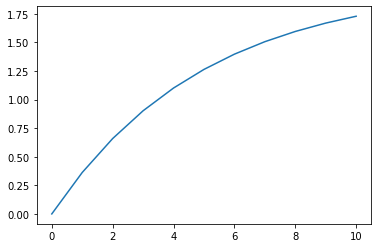

In [17]:
plt.plot(t,y)

In [18]:
def firstorder(y, t, K, u):
    tau = 5.0 
    dydt = (-y + K * u ) / tau
    return dydt

In [19]:
t = np.linspace(0,10,11)
K = 2.0
u = 1.0

In [20]:
y = odeint(firstorder,0,t, args=(K,u))

In [29]:
t = np.linspace(0,10,11)
K = 2.0
u = np.zeros(len(t))
u[3:] = 1.0
y0 = 0
print(u)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
ys = np.zeros(len(t))
ys[0] = y0
for i in range(len(t) - 1):
    ts = [t[i], t[i+1]]
    y = odeint(firstorder, y0, ts, args=(K,u[i]))
    y0 = y[1]
    ys[i+1] = y0
    print(y[1])

[0.]
[0.]
[0.]
[0.36253849]
[0.65935989]
[0.90237668]
[1.101342]
[1.26424102]
[1.39761146]
[1.50680593]


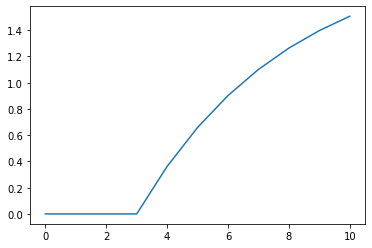

In [31]:
plt.plot(t,ys)

# [example](https://apmonitor.com/pdc/index.php/Main/TankBlending) & [tutorial](https://www.youtube.com/watch?v=8-V5T40aMEc)

![img](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F08ad88b2-63e1-4a89-ad7e-12c3fb4c9960%2FUntitled.png?table=block&id=1e5f1207-e09e-41fd-bc70-672fa795d92f&spaceId=36c3e647-06c4-4ed1-99a1-3706e50f66f0&width=1850&userId=b9f59011-0253-43ef-946a-512501504ba8&cache=v2)

![](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fb98c1079-492a-46cf-a832-74eda00e4b41%2FUntitled.png?table=block&id=00a11124-f48c-4727-8568-94c3d3c4e918&spaceId=36c3e647-06c4-4ed1-99a1-3706e50f66f0&width=1850&userId=b9f59011-0253-43ef-946a-512501504ba8&cache=v2)

Text(0.5, 0, 'Time (hr)')

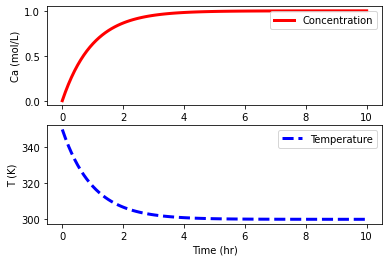

In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define mixing model
def mixer(x,t,Tf,Caf):
    # Inputs (2):
    # Tf = Feed Temperature (K)
    # Caf = Feed Concentration (mol/m^3)
    # States (2):
    # Concentration of A (mol/m^3)
    Ca = x[0]
    # Temperature
    T = x[1]
    # Parameters:
    # Volumetric Flowrate (m^3/hr)
    q = 100
    # Volume of CSTR (m^3)
    V = 100
    # Calculate concentration derivative
    dCadt = q/V*(Caf - Ca)
    dTdt = q/V*(Tf - T)
    return [dCadt, dTdt]

# Initial Condition
Ca0 = 0.0
T0 = 350.0
# Feed Temperature (K)
Tf = 300
# Feed Concentration (mol/m^3)
Caf = 1
# Time Interval (min)
t = np.linspace(0,10,100)

# Simulate mixer
y = odeint(mixer,[Ca0,T0],t,args=(Tf,Caf))
Ca = y[:,0]
T = y[:,1]

# Construct results and save data file
# Column 1 = time
# Column 2 = concentration
data = np.vstack((t,Ca.T, T.T)) # vertical stack
data = data.T             # transpose data
np.savetxt('data.txt',data,delimiter=',')

# Plot the results
plt.subplot(2,1,1)
plt.plot(t,Ca,'r-',linewidth=3)
plt.ylabel('Ca (mol/L)')
plt.legend(['Concentration'],loc='best')

plt.subplot(2,1,2)
plt.plot(t,T,'b--',linewidth=3)
plt.ylabel('T (K)')
plt.legend(['Temperature'],loc='best')

plt.xlabel('Time (hr)')
# plt.show()